# Amazon book: Basic Proyect.

## EDA practice

# Importing the main libraries

In [1]:
# importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # way to ignore the warnnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
# showing the data
ruta="https://raw.githubusercontent.com/HaloReach2552/Data_repository/main/Benchmark/data/amazon.csv"
amazon=pd.read_csv(ruta)
amazon.head(4)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction


In [3]:
print("number of rows",amazon.shape[0])
print("number of columns", amazon.shape[1])

number of rows 550
number of columns 7


In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Algunas transformaciones

In [5]:
amazon["Genre"]=amazon["Genre"].astype("category")

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         550 non-null    object  
 1   Author       550 non-null    object  
 2   User Rating  550 non-null    float64 
 3   Reviews      550 non-null    int64   
 4   Price        550 non-null    int64   
 5   Year         550 non-null    int64   
 6   Genre        550 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 26.6+ KB


In [7]:
amazon.rename(columns={"Name":"Nombre","Author":"Autor","User Rating":"Popularidad","Reviews":"Reseña",
                      "Price":"Precio","Year":"Año","Genre":"Genero"}, inplace=True)

In [8]:
amazon[:6]

,Nombre,Autor,Popularidad,Reseña,Precio,Año,Genero
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


In [9]:
amazon["Popularidad"].unique()


bins=[0,4,4.8,7]
labels=["Bajo","Medio","Alto"]

amazon["Niveles"]=pd.cut(amazon["Popularidad"], bins, labels=labels)

amazon.head(5)

,Nombre,Autor,Popularidad,Reseña,Precio,Año,Genero,Niveles
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Medio
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Medio
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Medio
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Medio
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Medio


       Niveles
Medio      477
Alto        52
Bajo        21


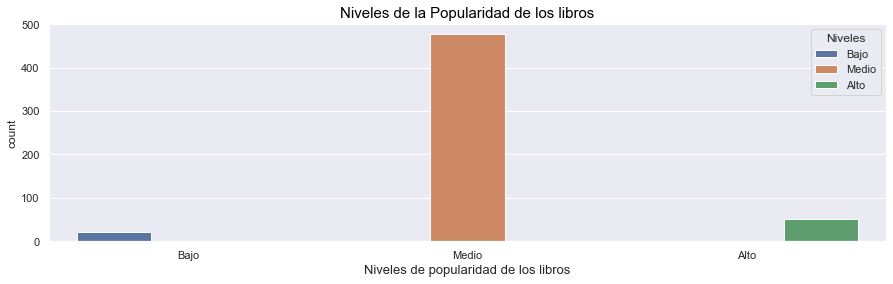

In [10]:
niveles=amazon["Niveles"].value_counts().to_frame()
print(niveles)
plt.figure(figsize=(15,4))
ax=sns.countplot(amazon["Niveles"], hue="Niveles", data=amazon)
ax.set_title("Niveles de la Popularidad de los libros", fontsize=15, color="black")
ax.set_xlabel("Niveles de popularidad de los libros", fontsize=13)
plt.show()

In [12]:
años_1=list(range(2009,2019))

In [15]:
carpeta=[]
for i in años_1:
    hello=amazon.loc[(amazon["Niveles"]=="Alto") & (amazon["Año"]== i)]
    carpeta.append(hello) 

# Filtrado de la base de datos segun el Precio y el Año

In [16]:
filtrar=amazon[["Precio","Año"]].groupby("Año").mean()
filtrar

,Precio
Año,
2009,15.40
2010,13.48
2011,15.10
2012,15.30
2013,14.60
2014,14.64
2015,10.42
2016,13.18
2017,11.38


<AxesSubplot:xlabel='Año'>

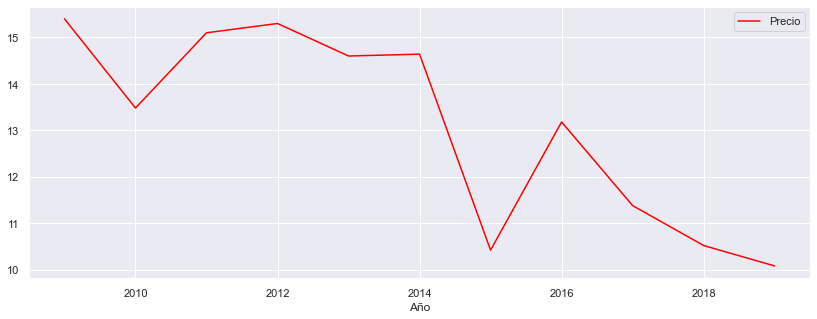

In [17]:
fig,ax=plt.subplots(figsize=(14,5))
filtrar.plot(ax=ax, color="red")


In [18]:
fiction=amazon[amazon["Genero"]=="Fiction"]
no_fiction=amazon[amazon["Genero"]=="Non Fiction"]

In [19]:
filtrar_fiction=fiction[["Año","Genero","Precio"]].groupby(by=["Año"]).mean()
filtrar_nonfiction=no_fiction[["Año","Genero","Precio"]].groupby(by=["Año"]).mean()

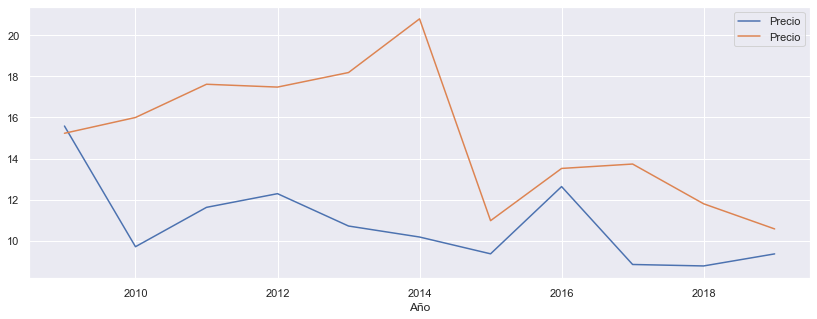

In [20]:
filtrar_fiction.Precio.plot(figsize=(14,5))
plt.legend("--")
filtrar_nonfiction.Precio.plot(figsize=(14,5))
plt.legend()
plt.show()

# Popularidad del libro segun el genero

In [21]:
best_fiction=fiction[["Año","Reseña","Genero"]].groupby(by="Año").sum()
best_no_fiction=no_fiction[["Año","Reseña","Genero"]].groupby("Año").sum()

<AxesSubplot:xlabel='Año'>

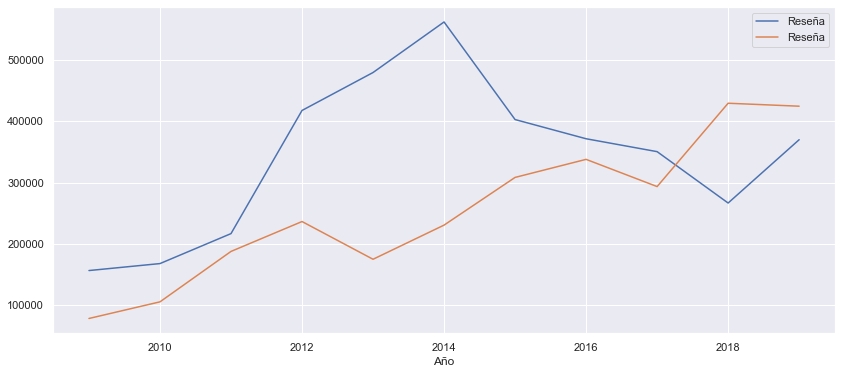

In [22]:
fig,ax=plt.subplots(figsize=(14,6))
best_fiction.plot(ax=ax)
best_no_fiction.plot(ax=ax)

In [23]:
re_fiction=fiction[["Año","Popularidad","Genero"]].groupby(by="Año").sum()
re_no_fiction=no_fiction[["Año","Popularidad","Genero"]].groupby("Año").sum()

<AxesSubplot:xlabel='Año'>

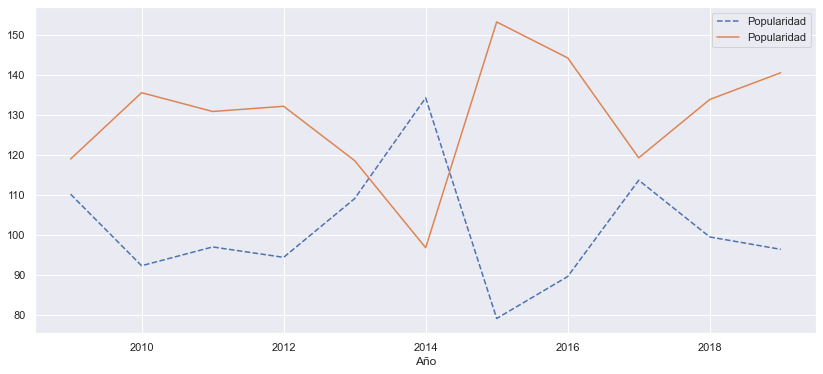

In [24]:
fig,ax=plt.subplots(figsize=(14,6))
re_fiction.plot(ax=ax, style="--")
re_no_fiction.plot(kind="line", ax=ax)

# Genero con mayor cantidad de libros

In [25]:
genero=amazon["Genero"].value_counts()
genero

Non Fiction    310
Fiction        240
Name: Genero, dtype: int64

<AxesSubplot:xlabel='Genero', ylabel='count'>

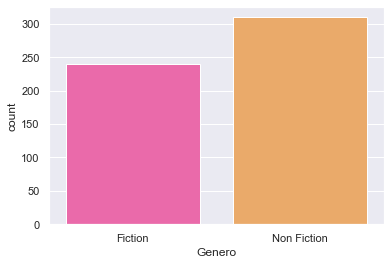

In [26]:
sns.countplot(amazon["Genero"], palette="spring")